
First 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-nu

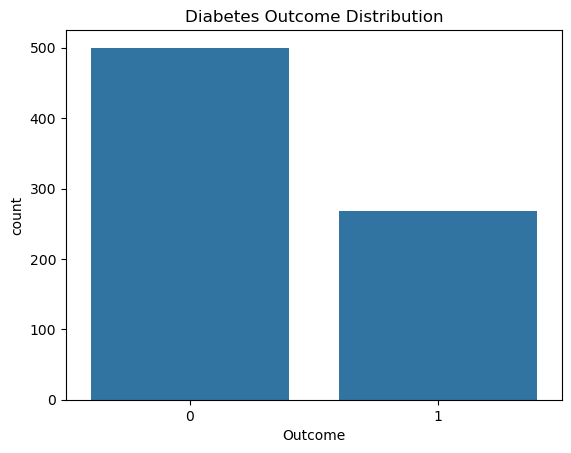


Decision Tree Results:
Accuracy: 0.7467532467532467
Confusion Matrix:
 [[75 24]
 [15 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Random Forest Results:
Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Overfitting / Underfitting Analysis:
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7467532467532

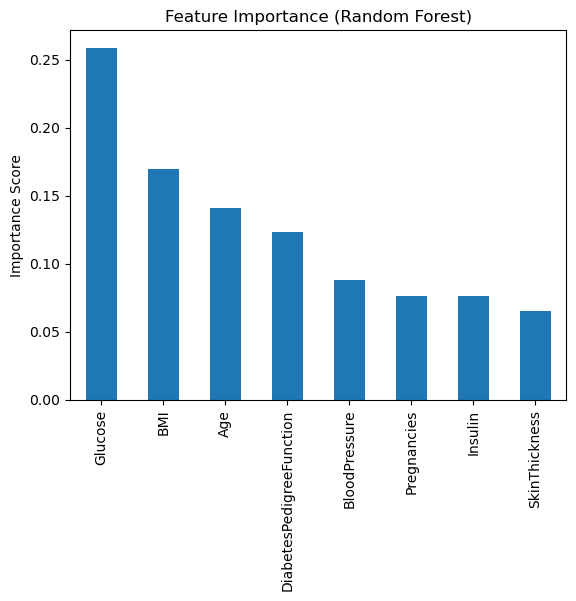

In [3]:
# ==========================================
# Diabetes Prediction using ML
# ==========================================

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None)

columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
data.columns = columns

print("\nFirst 5 rows of dataset:")
print(data.head())

# 3. Dataset Information
print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

# 4. Data Visualization
sns.countplot(x='Outcome', data=data)
plt.title("Diabetes Outcome Distribution")
plt.show()

# 5. Feature Selection and Split
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

# 7. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# 8. Overfitting vs Underfitting Check
print("\nOverfitting / Underfitting Analysis:")
print("Decision Tree Train Accuracy:", dt_model.score(X_train, y_train))
print("Decision Tree Test Accuracy:", dt_model.score(X_test, y_test))

print("Random Forest Train Accuracy:", rf_model.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))

# 9. Cross Validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("\nCross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# 10. Feature Importance
feature_importance = pd.Series(
    rf_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

print("\nFeature Importance:")
print(feature_importance)

feature_importance.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()